# Static Graph Rendering with plot_static()

Render graphs as static images (SVG, PNG) for documentation, reports, and presentations.

**Key point**: `plot_static()` works with **any layout** - UMAP, ring, graphviz, or manual positions.

In [1]:
import pandas as pd
import graphistry

# Sample graph
edges_df = pd.DataFrame({'src': ['a', 'a', 'b', 'c', 'd'], 'dst': ['b', 'c', 'c', 'd', 'e']})
nodes_df = pd.DataFrame({
    'id': ['a', 'b', 'c', 'd', 'e'],
    'type': ['start', 'middle', 'middle', 'middle', 'end'],
    'label': ['Start', 'Step 1', 'Step 2', 'Step 3', 'End']
})
g = graphistry.edges(edges_df, 'src', 'dst').nodes(nodes_df, 'id')

## Basic Usage

Auto-displays in Jupyter, returns SVG bytes:

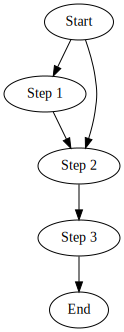

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.42.4 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="124pt" height="332pt"\n viewBox="0.00 0.00 124.00 332.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 328)">\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-328 120,-328 120,4 -4,4"/>\n<!-- a -->\n<g id="a" class="node">\n<title>a</title>\n<ellipse fill="none" stroke="black" cx="75" cy="-306" rx="34.5" ry="18"/>\n<text text-anchor="middle" x="75" y="-302.3" font-family="Times,serif" font-size="14.00">Start</text>\n</g>\n<!-- b -->\n<g id="b" class="node">\n<title>b</title>\n<ellipse fill="none" stroke="black" cx="41" cy="-234" rx="41" ry="18"/>\n<text text-anchor="middle" x="41" y="-230.3" font-family="Times,serif" font-size="

In [2]:
g.plot_static()

## Styling with graph_attr, node_attr, edge_attr

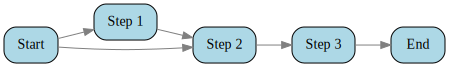

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.42.4 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="449pt" height="67pt"\n viewBox="0.00 0.00 449.00 67.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 63)">\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-63 445,-63 445,4 -4,4"/>\n<!-- a -->\n<g id="a" class="node">\n<title>a</title>\n<path fill="lightblue" stroke="black" d="M42,-36C42,-36 12,-36 12,-36 6,-36 0,-30 0,-24 0,-24 0,-12 0,-12 0,-6 6,0 12,0 12,0 42,0 42,0 48,0 54,-6 54,-12 54,-12 54,-24 54,-24 54,-30 48,-36 42,-36"/>\n<text text-anchor="middle" x="27" y="-14.3" font-family="Times,serif" font-size="14.00">Start</text>\n</g>\n<!-- b -->\n<g id="b" class="node">\n<title>b</title>\n<path fill="lightblue" stroke="black"

In [3]:
g.plot_static(
    graph_attr={'rankdir': 'LR', 'bgcolor': 'white'},
    node_attr={'shape': 'box', 'style': 'rounded,filled', 'fillcolor': 'lightblue'},
    edge_attr={'color': 'gray'}
)

## Per-Node Styling (Data-Driven)

Add graphviz attribute columns to your dataframe:

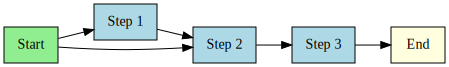

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.42.4 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="449pt" height="67pt"\n viewBox="0.00 0.00 449.00 67.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 63)">\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-63 445,-63 445,4 -4,4"/>\n<!-- a -->\n<g id="a" class="node">\n<title>a</title>\n<polygon fill="lightgreen" stroke="black" points="54,-36 0,-36 0,0 54,0 54,-36"/>\n<text text-anchor="middle" x="27" y="-14.3" font-family="Times,serif" font-size="14.00">Start</text>\n</g>\n<!-- b -->\n<g id="b" class="node">\n<title>b</title>\n<polygon fill="lightblue" stroke="black" points="153,-59 90,-59 90,-23 153,-23 153,-59"/>\n<text text-anchor="middle" x="121.5" y="-37.3" font-family="Ti

In [4]:
nodes_styled = nodes_df.copy()
nodes_styled['fillcolor'] = nodes_styled['type'].map({
    'start': 'lightgreen', 'middle': 'lightblue', 'end': 'lightyellow'
})
nodes_styled['shape'] = 'box'

g_styled = graphistry.edges(edges_df, 'src', 'dst').nodes(nodes_styled, 'id')
g_styled.plot_static(graph_attr={'rankdir': 'LR'}, node_attr={'style': 'filled'})

## Layout Programs

| Program | Best For |
|---------|----------|
| `dot` | Hierarchies, DAGs |
| `neato` | Small undirected graphs |
| `circo` | Circular layouts |

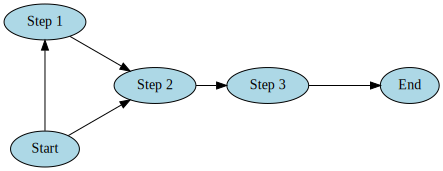

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.42.4 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="444pt" height="171pt"\n viewBox="0.00 0.00 443.60 171.27" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 167.27)">\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-167.27 439.6,-167.27 439.6,4 -4,4"/>\n<!-- a -->\n<g id="a" class="node">\n<title>a</title>\n<ellipse fill="lightblue" stroke="black" cx="41" cy="-18" rx="34.5" ry="18"/>\n<text text-anchor="middle" x="41" y="-14.3" font-family="Times,serif" font-size="14.00">Start</text>\n</g>\n<!-- b -->\n<g id="b" class="node">\n<title>b</title>\n<ellipse fill="lightblue" stroke="black" cx="41" cy="-145.27" rx="41" ry="18"/>\n<text text-anchor="middle" x="41" y="-141.57" font-family=

In [5]:
g.plot_static(prog='circo', node_attr={'style': 'filled', 'fillcolor': 'lightblue'})

## Output Formats

In [6]:
# DOT source text
dot = g.plot_static(engine='graphviz-dot')
print(dot[:200])

digraph "" {
	graph [bb="0,0,115.89,324"];
	node [label="\N"];
	a	[height=0.5,
		id=a,
		label=Start,
		pos="74.946,306",
		width=0.95686];
	b	[height=0.5,
		id=b,
		label="Step 1",
		pos="40.946,234"


In [7]:
# Mermaid DSL
mermaid = g.plot_static(engine='mermaid-code')
print(mermaid)

graph LR
    a --> b
    a --> c
    b --> c
    c --> d
    d --> e


## Finding More Options

Discover available attributes:

In [8]:
from graphistry.plugins_types.graphviz_types import GRAPH_ATTRS, NODE_ATTRS, EDGE_ATTRS, PROGS
print('Progs:', PROGS[:6])
print('Node attrs (sample):', NODE_ATTRS[:8])

Progs: ['acyclic', 'ccomps', 'circo', 'dot', 'fdp', 'gc']
Node attrs (sample): ['area', 'class', 'color', 'colorscheme', 'comment', 'distortion', 'fillcolor', 'fixedsize']


**External references**:
- [Graphviz Attributes](https://graphviz.org/doc/info/attrs.html)
- [Graphviz Shapes](https://graphviz.org/doc/info/shapes.html)
- [Graphviz Colors](https://graphviz.org/doc/info/colors.html)

## See Also

- [graphviz.ipynb](graphviz.ipynb) - Layout algorithms for interactive Graphistry viz